# Imports
Imports all relevenat libraries to be used in this project.

In [28]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud

matplotlib.style.use('ggplot')

# Load the text
Load the groupchat text 

In [5]:
def groupchat(filename):
    with open(filename, encoding="utf-8") as f:
        return f.read()
    

In [51]:
#store the text in chat...
chat = groupchat("my-whatsapp-text")


# Data cleaning...

Separate the texts into Date, Time, Sender/User and Message using regular expresions and pattern matching...
Note, some of the texts will be about actions like when new users are been added, or user left the group, or someone changes the name of the group.

In [52]:
date_pattern = r'\d+/\d+/\d+' #the date pattern
all_dates = re.findall((date_pattern), chat) #filter out all he dates
msg_dates = [] #to store the dates for messages messages alone
non_msg_dates = []  #to store the dates for actions
sender_msg = re.split((date_pattern), chat) #remove the date from the chats, left with only users and messages
sender = [] #to store users
msg = [] # to store messages alone
time = [] # to store time message was sent
nonMatch = [] # to store actions...
count = 0
for item in sender_msg:
    matchObj = re.match(r', (.*) - (.*): (.*)', item, re.DOTALL)
    if matchObj:
        msg_dates.append(all_dates[count-1])
        time.append(matchObj.group(1))
        sender.append(matchObj.group(2))
        msg.append(matchObj.group(3))
    else:
        non_msg_dates.append(all_dates[count])
        nonMatch.append(item)
    count = count + 1


# Data preparation...

Store the data in numpy and pandas datatype for analysis

In [53]:
numpy_data = np.array([msg_dates, time, sender, msg])
numpy_data = numpy_data.transpose()
pd_data = pd.DataFrame(numpy_data, columns=["Date", "Time", "User", "Message"])

# Data analysis...

count the most active user, dates and plot wordcloud

In [54]:
most_active_user = pd_data.User.value_counts()
most_active_date = pd_data.Date.value_counts()

In [55]:
def plot_wordcloud(msg):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(", ".join(msg))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
    img_path = "./wordcloud.png"
    wordcloud.to_file(img_path)

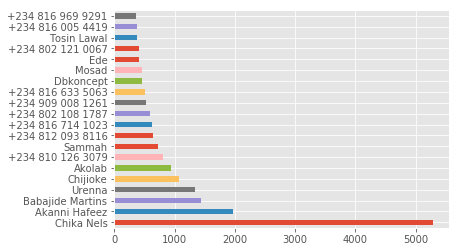

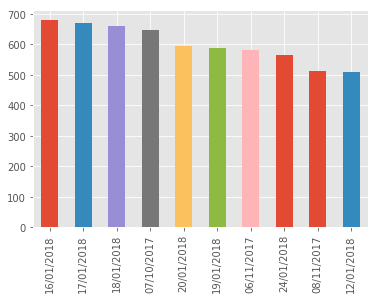

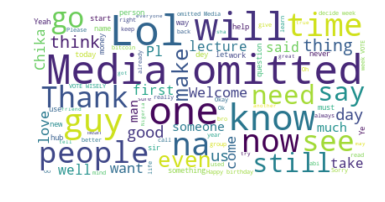

In [56]:
most_active_user[:20].plot(kind='barh')
plt.show()
most_active_date[:10].plot(kind='bar')
plt.show()


plot_wordcloud(msg)